In [1]:
%pip install ultralytics



                                              0.0/612.0 kB ? eta -:--:--
     -                                       30.7/612.0 kB 1.4 MB/s eta 0:00:01
     -                                       30.7/612.0 kB 1.4 MB/s eta 0:00:01
     -                                       30.7/612.0 kB 1.4 MB/s eta 0:00:01
     ---                                   61.4/612.0 kB 233.8 kB/s eta 0:00:03
     ---                                   61.4/612.0 kB 233.8 kB/s eta 0:00:03
     ---                                   61.4/612.0 kB 233.8 kB/s eta 0:00:03
     -----                                 92.2/612.0 kB 238.1 kB/s eta 0:00:03
     ------                               112.6/612.0 kB 273.1 kB/s eta 0:00:02
     ------                               112.6/612.0 kB 273.1 kB/s eta 0:00:02
     ------                               112.6/612.0 kB 273.1 kB/s eta 0:00:02
     -------                              122.9/612.0 kB 200.4 kB/s eta 0:00:03
     -------                              122.

In [3]:
!pip3 install torch 

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torchvision
from ultralytics import YOLO
import easyocr

# Model1

In [10]:
def mainSection(imagePath):
    menu_image = Image.open(imagePath)
    cropped_images = []
    model_1 = YOLO("./models/model_1.pt")
    prediction = model_1.predict(menu_image, verbose=False)
    for predicted_image in prediction:                    #model_1.predict(menu_image, verbose=False):
        for section in predicted_image.boxes:
            x_min, y_min, x_max, y_max, confidence, class_id = section.data[0].cpu().numpy()
            cropped_image_section = menu_image.crop((x_min, y_min, x_max, y_max))
            cropped_images.append(cropped_image_section)
    return cropped_images

# Model2 

In [11]:
def sectionAndDishes(imagePath):
    menuSectionImage = Image.open(imagePath)
    cropped_images = []
    dataDict = {}
    model_2 = YOLO("./models/model_2.pt")
    
    prediction = model_2.predict(menuSectionImage, verbose=False)
    section_name = []  # List to store section names
    
    for predicted_image in prediction:
        for sectionComponent in predicted_image.boxes:
            x_min, y_min, x_max, y_max, confidence, class_id = sectionComponent.data[0].cpu().numpy()
            component = menuSectionImage.crop((x_min, y_min, x_max, y_max))
            cropped_images.append(component)
            
            if int(class_id) == 2:
                reader = easyocr.Reader(['en'])
                section_name = reader.readtext(np.array(component))
                section_name = [res[1] for res in section_name]
                print(section_name)
                section_name.append(section_name)
    
    dataDict['ImageList'] = cropped_images
    dataDict['SectionNames'] =  str(section_name)
    return dataDict


# Model3 correct

In [12]:
def dishesComponent(imagePath, section):
    reader = easyocr.Reader(['en'])
    prices = []
    descs = []
    titles = []
    dishImage = Image.open(imagePath)
    model_3 = YOLO("./models/model_3.pt")
    dishdict = {}
    for predicted_image in model_3.predict(dishImage, verbose=False):
        for dishComponent in predicted_image.boxes:
            x_min, y_min, x_max, y_max, confidence, class_id = dishComponent.data[0].cpu().numpy()
            component = dishImage.crop((x_min, y_min, x_max, y_max))
            try:
                txt = reader.readtext(np.array(component))
                txt = [res[1] for res in txt]
            except:
                txt = "Exception Text"
            if int(class_id) == 0:
                if len(txt) == 1:
                    descs.append(txt[0])
                else:
                    descs.extend(txt)
            elif int(class_id) == 1:
                if len(txt) == 1:
                    titles.append(txt[0])
                else:
                    titles.extend(txt)
            elif int(class_id) == 2:
                if len(txt) == 1:
                    prices.append(txt[0])
                else:
                    prices.extend(txt)
    
    if descs:
        dishdict['Description'] = str(descs)
    if titles:
        dishdict['Title'] = str(titles)
    if prices:
        dishdict['Price'] = str(prices)
    
    dishdf = pd.DataFrame(dishdict, index=[0])
    return dishdf


In [15]:
imagePath = "./5040895_.pdf_10.jpg"
sectionImages = mainSection(imagePath)
menuDF = pd.DataFrame()
for singleSection in sectionImages:
    filename = "section.jpg"
    singleSection.save(filename)
    dishImagesData = sectionAndDishes(filename)
    sectionName = dishImagesData['SectionNames']
    dishImagesList = dishImagesData['ImageList']
    sectionDF = pd.DataFrame()
    for dishImage in dishImagesList:
        filename1 = "d.jpg"
        dishImage.save(filename1)
        dishdf = dishesComponent(filename1,section=sectionName)
        sectionDF = pd.concat([sectionDF, dishdf])
    sectionDF['section'] = sectionName
    menuDF = pd.concat([menuDF, sectionDF])
    menuDF= menuDF.reset_index(drop=True)
        

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['WHITE WINE']


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster wi

['RED WINE']


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['ROSE WINE']


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['SWEET & FORTIFED']


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [18]:
import os
import pandas as pd
from datetime import datetime

# Path to the folder containing the images
folder_path = r"./"

# List all files in the folder
files = os.listdir(folder_path)

# Define the desired column order for the menu dataframe
menu_columns = ['section', 'Title', 'Price', 'Description']  # Adjust as per your requirement

# Iterate over each file in the folder
for idx, file in enumerate(files):
    # Check if the file is an image (e.g., JPG, PNG, etc.)
    if file.endswith((".jpg", ".png", ".jpeg")):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, file)

        # Process the image using the existing code
        sectionImages = mainSection(image_path)
        menuDF = pd.DataFrame(columns=menu_columns)  # Initialize menu dataframe with desired column order

        for singleSection in sectionImages:
            filename = "section.jpg"
            singleSection.save(filename)
            dishImagesData = sectionAndDishes(filename)
            sectionName = dishImagesData['SectionNames']
         
            dishImagesList = dishImagesData['ImageList']
            print(dishImagesList)
            sectionDF = pd.DataFrame()

            for dishImage in dishImagesList:
                filename1 = "d.jpg"
                dishImage.save(filename1)
                dishdf = dishesComponent(filename1, section=sectionName)
                sectionDF = pd.concat([sectionDF, dishdf])

            sectionDF['section'] = sectionName
            menuDF = pd.concat([menuDF, sectionDF])

        menuDF = menuDF.reset_index(drop=True)
        menuDF = menuDF.drop_duplicates(subset=['Title', 'Price'],keep="first")

        # Generate a timestamp
        timestamp = datetime.now().strftime("%Y%m%d%H%M%S")

        # Construct the output filename with timestamp
        output_filename = f"{os.path.splitext(file)[0]}_{timestamp}.csv"
        output_path = os.path.join(folder_path, output_filename)

        # Save the dataframe to a file
        menuDF.to_csv(output_path, index=False)

        # Print statement when moving to the second image
        if idx == 1:
            print("Moving to the second image...")

        # Print statement after processing each image
        print(f"Processed image: {file}")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['WHITE WINE']
[<PIL.Image.Image image mode=RGB size=266x58 at 0x17002BFDEE0>, <PIL.Image.Image image mode=RGB size=1094x51 at 0x17002BFDC70>, <PIL.Image.Image image mode=RGB size=1097x52 at 0x17074709C40>, <PIL.Image.Image image mode=RGB size=1093x52 at 0x17002BFDFA0>, <PIL.Image.Image image mode=RGB size=1095x53 at 0x17008140280>, <PIL.Image.Image image mode=RGB size=1095x52 at 0x1700815DEE0>, <PIL.Image.Image image mode=RGB size=1095x54 at 0x1700815D310>, <PIL.Image.Image image mode=RGB size=1096x49 at 0x1700815DF40>, <PIL.Image.Image image mode=RGB size=1088x57 at 0x1700815DD30>, <PIL.Image.Image image mode=RGB size=1094x50 at 0x1700815DBE0>, <PIL.Image.Image image mode=RGB size=820x47 at 0x1700815D7F0>]


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster wi

['RED WINE']
[<PIL.Image.Image image mode=RGB size=1096x62 at 0x1706A0675E0>, <PIL.Image.Image image mode=RGB size=1098x65 at 0x1706A207D00>, <PIL.Image.Image image mode=RGB size=1096x60 at 0x1706A067E20>, <PIL.Image.Image image mode=RGB size=1097x60 at 0x17067120280>, <PIL.Image.Image image mode=RGB size=222x58 at 0x1706A067A30>, <PIL.Image.Image image mode=RGB size=1096x62 at 0x1706A067D00>, <PIL.Image.Image image mode=RGB size=1096x62 at 0x17068D72040>, <PIL.Image.Image image mode=RGB size=1098x55 at 0x170746D1D90>]


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['ROSE WINE']
[<PIL.Image.Image image mode=RGB size=220x47 at 0x17002638490>, <PIL.Image.Image image mode=RGB size=1091x59 at 0x170026385E0>, <PIL.Image.Image image mode=RGB size=1095x58 at 0x170608A1490>]


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['SWEET & FORTIFED']
[<PIL.Image.Image image mode=RGB size=1092x63 at 0x17002D8AA00>, <PIL.Image.Image image mode=RGB size=349x53 at 0x17002C8FDF0>]


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processed image: 5040895_.pdf_10.jpg


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['SWEET & FORTIFED']
[<PIL.Image.Image image mode=RGB size=335x35 at 0x17072B73C10>]
Moving to the second image...
Processed image: d.jpg


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['SWEET & FORTIFED']
[<PIL.Image.Image image mode=RGB size=329x34 at 0x17006AE3370>]
Processed image: section.jpg


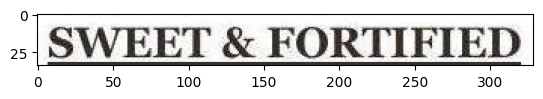

In [19]:

for item in dishImagesList:
    plt.imshow(item)
    plt.show()

In [20]:
menuDF.drop_duplicates(subset=['section', 'Title', 'Price','Description'],keep="first")

,section,Title,Price,Description
0,"['SWEET & FORTIFED', [...]]",['SWEET & FORTIFIED'],NaN,NaN


In [25]:
menuDF["Description"][0]

nan

In [26]:
menuDF["Description"][0]

nan